# 7. Visualizacion de datos en Pandas: Otros gráficos

En el capítulo anterior vimos como podemos representar los datos de un DataFrame de forma gráfica. En este estudiaremos la forma de generar **tres gráficos** muy utilizados en anáisis de datos como son:

* Gráfico de dispersión (Scatter plot)
* Diagrama de caja (Boxplot)
* Histograma

```{figure} ../pandas_tic_2/imagenes/plot_overview.svg
---
name: dataframe
width: 70%
---
Gráficos con Pandas

## 7.1. Escenario

Imagina que trabajas como **ingeniero/a de calidad** en una fábrica. **Cada día**, la fábrica registra **cuántas piezas** ha producido y cuántas de esas piezas han tenido **defectos**.

Tu tarea es analizar los datos de **30 días** para ayudar a detectar:
- Posibles días con problemas de calidad.
- Relación entre producción y defectos.
- Comportamientos anómalos o tendencias.

Usaremos **solo `pandas`** para cargar los datos y crear gráficos básicos: scatter plot, boxplot e histograma.

In [1]:
import pandas as pd

# Datos de producción de la fábrica durante 30 días recopilados en un diccionario denominado "data"

data = pd.read_csv("datasets/calidad.csv")


# Creamos el DataFrame "df"
df = pd.DataFrame(data)

# Visualizamos los cinco primeros datos
df.head(5)

,Dia,Piezas_producidas,Defectos
0,D1,1001,1
1,D2,964,1
2,D3,950,1
3,D4,1010,3
4,D5,970,2


### - Gráfico de dispersión (scatter plot)

```{figure} imagenes/scatter1.png
---
figclass: margin
name: dataframe
---
Gráfico de dispersión
```

```{admonition} 📊 ¿Qué es?

Un gráfico de dispersión (o scatter plot, en inglés) es un tipo de gráfico que muestra la **relación entre dos variables** usando puntos en un plano cartesiano (eje X y eje Y).

Cada punto representa un dato.

* El **eje X (horizontal)** suele ser la variable independiente (la que controlamos o medimos primero).

* El **eje Y (vertical)** suele ser la variable dependiente (la que queremos analizar en relación con X).


```

```{figure} imagenes/scatter2.png
---
figclass: margin
name: dataframe
---
Análisis de dispersión
```

```{admonition} 🎯 ¿Para qué sirve?

Se usa para responder preguntas como:

1. **¿Existe una relación entre las dos variables?**

    * Ejemplo: "¿A más horas de estudio, mejores notas?"

2. **¿Es fuerte o débil esa relación?**

    * Si los puntos están muy agrupados en una tendencia, la relación es fuerte.

3. **¿Qué tipo de relación es?**

    * Positiva (cuando X aumenta, Y también).

    * Negativa (cuando X aumenta, Y disminuye).

    * Nula (no hay patrón claro).
```

#### Análisis 1: Día contra Defectos detectados

Vamos a estudiar si hay relación entre el **día de mes y los defectos detectados**.

En el eje X se colocan los **días**, y en el eje Y el número de **defectos**.

Sintaxis básica: `plot.scatter`.

<Axes: title={'center': 'Día vs Defectos'}, xlabel='Dia', ylabel='Defectos'>

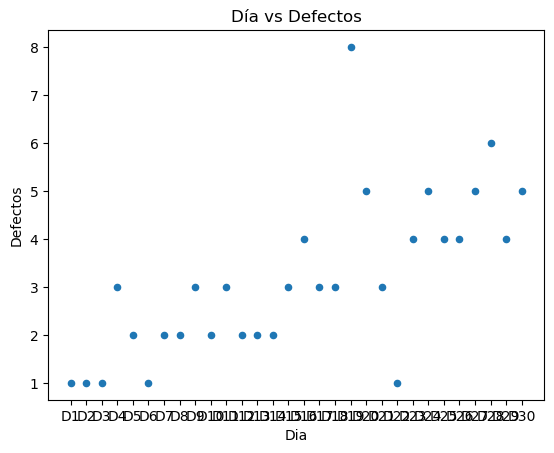

In [2]:
df.plot.scatter(x='Dia', y='Defectos', title='Día vs Defectos')

```{admonition} Análisis del gráfico de dispersión
:class: tip 

Puede observarse un **correlación positiva** (tendencia ascendente) entre los **días del mes** y los **defectos**. Esto significa que a medida que pasan los días, los defectos aumentan.
```

```{admonition} Medidas correctoras
:class: danger
1. Causas Probables:

* Fatiga de equipo/trabajadores (final de mes).

* Presión por alcanzar metas u objetivos (piezas producidas a final de mes)

* Mantenimiento delas máquinas defectuoso o postergado .

2. Acciones Clave:

* Mantenimiento preventivo antes de los picos de defectos (días 20-25).

* Ajustar turnos para evitar fatiga acumulada.

* Reforzar controles de calidad en la última semana.

* Balancear producción para evitar sobrecargas.

3. Monitoreo:

* Usar gráficos de control (ej. Shewhart) y reuniones semanales.

* Visualizar datos con scatter plot + línea de tendencia (Excel).

```

#### Análisis 2: Días contra Piezas fabricadas

<Axes: title={'center': 'Día vs Piezas producidas'}, xlabel='Dia', ylabel='Piezas_producidas'>

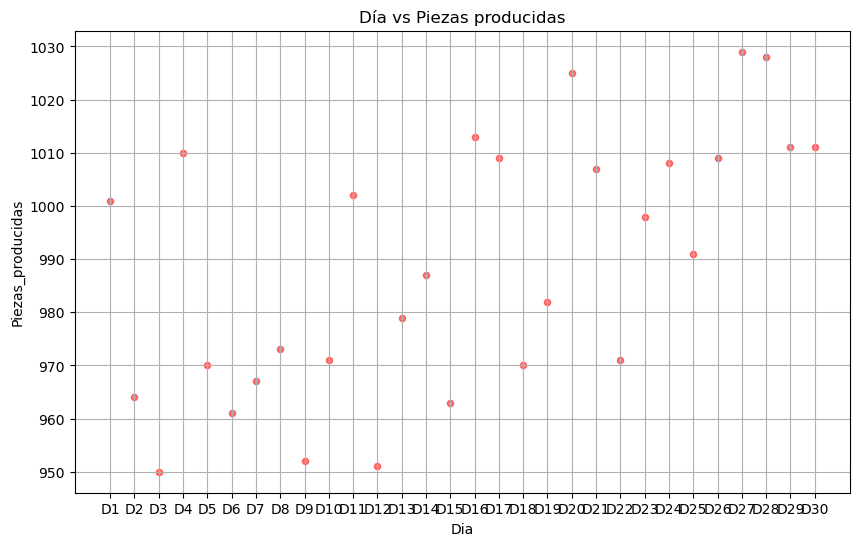

In [3]:
# En este caso vamos a dar formato al gráfico con algunas propiedades (color, grid...)

df.plot.scatter(
    x='Dia', 
    y='Piezas_producidas', 
    title='Día vs Piezas producidas',
    figsize=(10, 6),  # Tamaño del gráfico
    color='red',      # Color de los puntos
    alpha=0.5,        # Transparencia (0 a 1)
    grid=True )

```{admonition} Análisis del gráfico de dispersión
:class: tip 

Puede observarse un **correlación positiva** (tendencia ascendente) entre los los **días mes** y **piezas producidas**. Esto significa a medida que llega el fin de mes, la producción aumenta.
```

```{admonition} Medidas correctoras (en el caso de que la empresa considere la correlación problemática)
:class: danger

1. Planificación equilibrada:

* Distribuir metas diarias (evitar acumulación al final).

* Usar pronósticos de demanda para ajustar capacidad.

2. Ajustar incentivos:

* Premiar producción consistente, no solo volumen mensual.

3. Monitoreo:

* Alertas automáticas si producción diaria supera ±15% del promedio.

* Gráfico de control con:

    * Línea de meta constante.

    * Límites superior/inferior.

4. Riesgos si no se actúa:

* Sobrecarga de máquinas/personal → más defectos.
 
* Estrés laboral → rotación de personal.

5. Resultado esperado:

* Producción estable → Mejor calidad + eficiencia

```

## Diagrama de caja (box plot)

```{admonition} 📊 ¿Qué es?

Un box plot (también llamado diagrama de caja y bigotes) es una gráfica que resume de forma muy visual cómo se distribuyen los datos estadísticos más importantes. Nos ayuda a ver:
- Valores mínimos y máximos.
- Media.
- Mediana.
- Cuartiles
- Posibles valores atípicos (outliers).
```

```{admonition} 🧠 ¿Para qué sirve?

* Ver si los datos están centrados o desviados.

* Detectar si hay valores extremos o raros (outliers).

* Comparar varios grupos de datos fácilmente (por ejemplo, defectos en diferentes semanas).

* Ver cómo están repartidos los datos: ¿hay muchos valores bajos?, ¿altos?, ¿es simétrico?
```


```{admonition} 📊 ¿Qué partes tiene?

Imagina que tienes una lista de números, como los defectos diarios en una fábrica. El box plot te muestra:

* Caja central: entre el 25% (Q1) y el 75% (Q3) de los datos. Aquí está la mitad de los valores.

* Línea dentro de la caja: es la mediana (el valor que queda justo en el medio).

* Bigotes: líneas que van desde los extremos de la caja hasta los valores mínimo y máximo normales.

* Puntos fuera de los bigotes: son valores extremos o atípicos.
```

<Axes: title={'center': 'Distribución de defectos en el mes'}>

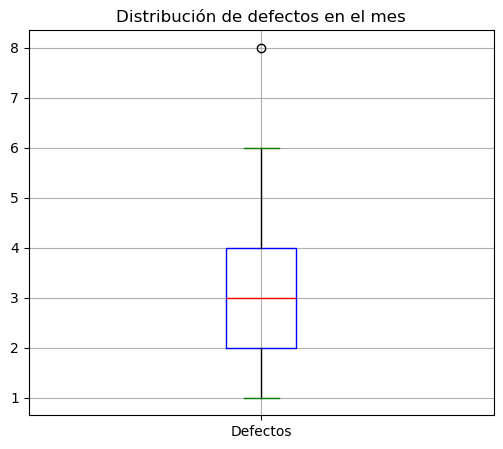

In [4]:
# + tags=["remove-output"]

df[['Defectos']].plot.box(
    title='Distribución de defectos en el mes',
    figsize=(6, 5),
    grid=True,
    color=dict(boxes='blue', whiskers='black', medians='red', caps='green')
)


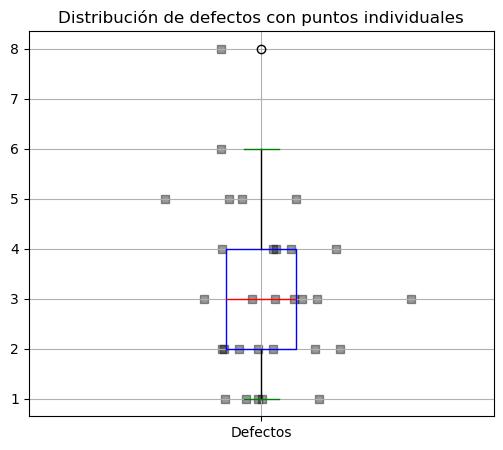

In [5]:
# Boxplot básico con pandas
ax = df[['Defectos']].plot.box(
    title='Distribución de defectos con puntos individuales',
    grid=True,
    color=dict(boxes='blue', whiskers='black', medians='red', caps='green'),
    figsize=(6, 5)
)

# Agregar puntos individuales (jitter manual para que no se solapen)
import numpy as np
x_jitter = np.random.normal(1, 0.15, size=len(df))  # Simula separación en X
ax.scatter(x_jitter, df['Defectos'], marker='s',alpha=0.4, color='black')


In [6]:
**Explicación**:a🔹 Q1 (Primer cuartil)
Es el borde inferior de la caja azul.

Representa el valor por debajo del cual está el 25% de los días.

En la imagen, Q1 parece estar en 2 → Esto significa que un cuarto de los días tuvo 2 defectos o menos.

🔸 Q2 (Mediana)
Es la línea roja dentro de la caja.

Marca el valor central: el 50% de los datos están por debajo, y el 50% por encima.

En el gráfico, la mediana está en 3 → Es el número de defectos típico de un día.

🔹 Q3 (Tercer cuartil)
Es el borde superior de la caja.

Representa el punto por debajo del cual está el 75% de los datos.

Aquí parece estar en 4 → Es decir, el 75% de los días tuvo 4 defectos o menos.

🧠 ¿Qué aprendemos?
La mayoría de los días tienen entre 2 y 4 defectos (la "caja").

Días con más de 4 ya están en el 25% más alto.

Algunos puntos más arriba (como el de 8) son valores inusuales, y podrían indicar fallos importantes.

SyntaxError: invalid character '🔹' (U+1F539) (2299757477.py, line 1)

## Histograma

El histograma nos muestra cómo se distribuye la producción diaria. Podemos ver si la mayoría de los días se producen más o menos piezas.

En este caso, usamos **10 grupos (bins)** para agrupar los valores.


In [ ]:
df['Piezas_producidas'].plot.hist(bins=10, title='Distribución de piezas producidas')


## Conclusiones

A partir de los gráficos podemos hacernos preguntas como:

- ¿Hay relación directa entre más producción y más defectos?
- ¿Existen días con defectos especialmente altos o bajos?
- ¿La producción es estable o varía mucho?

Este tipo de análisis se usa en el mundo real para tomar decisiones que **mejoran la calidad y la eficiencia de una empresa**.
